In [1]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

/Users/Anne/Documents/UIS/DAT540/Project_Netflix/Project/dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [2]:
import datetime as dt
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk

In [3]:
# function for text cleaning 
def clean_text(text):
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text



In [4]:
# create new data set with only type = Movie
new_set = data_set[data_set['type'] == 'Movie'].copy()
# Split genres into list
new_set['genre'] = new_set['listed_in'].apply(lambda x: x.split(', '))

In [5]:
# Clean each description and title using clean_text function
new_set['clean_desc'] = new_set['description'].apply(lambda x: clean_text(x))
new_set['clean_title'] = new_set['title'].apply(lambda x: clean_text(x))
#new_set.drop('clean_disc', axis=1, inplace=True)

# List of 8 genres with the least no. of movies
rare_genres = data_set[data_set.type=="Movie"].listed_in.str.split(', ').explode().value_counts().index[-8:]
# Rename the 8 rare genres above with "Other"
new_set['genre'] = new_set.genre.apply(lambda x: ["Other" if np.isin(y, rare_genres) else y for y in x])

#Remove International Movies genre as this is a genre that can not be defined from title or plot summary
#new_set['genre'] = (new_set.genre.map(set)-{'International Movies'}).map(list)

# add title to description
new_set['title_description'] = new_set['clean_title'] + str(" ") + new_set['clean_desc']

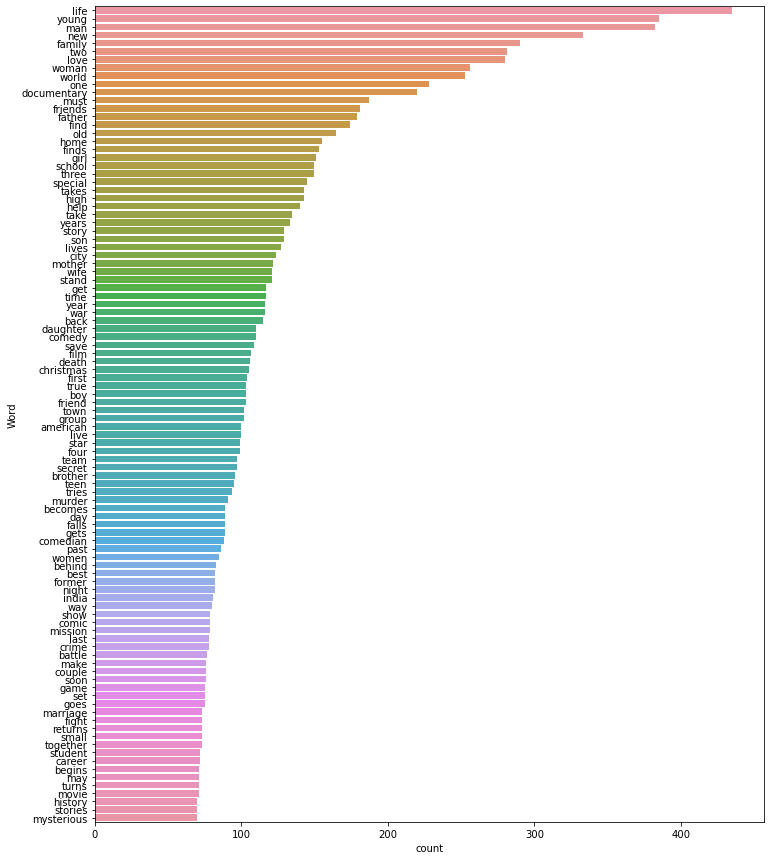

In [36]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(new_set['title_description'], 100)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Oystein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

new_set['title_description'] = new_set['title_description'].apply(lambda x: remove_stopwords(x))

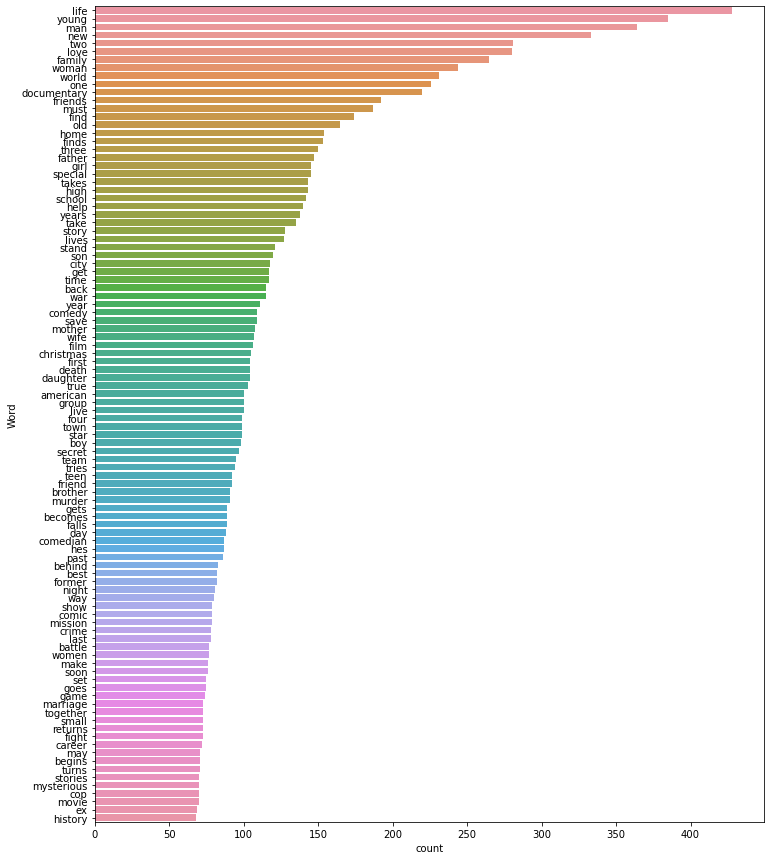

In [11]:
freq_words(new_set['title_description'], 100)

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_set['genre'])

# transform target variable
y = multilabel_binarizer.transform(new_set['genre'])

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


tfidf_vectorizer = TfidfVectorizer(max_df=0.4, max_features=1000)

In [107]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(new_set['title_description'], y, test_size=0.2, random_state=9)

In [108]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [109]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [110]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [111]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [112]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [113]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [121]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Stand-Up Comedy',)

In [115]:
# evaluate performance
f1_score(yval, y_pred, average="micro")


0.3220892274211099

In [116]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [117]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [118]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.49667579194368394

In [125]:
def infer_tags(q):
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [126]:
for i in range(100): 
  k = xval.sample(1).index[0] 
  print("Movie: ", new_set['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",new_set['genre'][k], "\n")


Movie:  The Heat: A Kitchen (R)evolution 
Predicted genre:  [()]
Actual genre:  ['Documentaries'] 

Movie:  Terra 
Predicted genre:  [('Documentaries',)]
Actual genre:  ['Documentaries'] 

Movie:  Kanika 
Predicted genre:  [()]
Actual genre:  ['Horror Movies', 'Thrillers'] 

Movie:  Sebastian Maniscalco: Why Would You Do That 
Predicted genre:  [()]
Actual genre:  ['Stand-Up Comedy'] 

Movie:  Gnome Alone 
Predicted genre:  [()]
Actual genre:  ['Children & Family Movies', 'Comedies'] 

Movie:  Pranaam 
Predicted genre:  [('Dramas',)]
Actual genre:  ['Action & Adventure', 'Dramas'] 

Movie:  Superbad 
Predicted genre:  [()]
Actual genre:  ['Cult Movies', 'Comedies'] 

Movie:  Mune: Guardian of the Moon 
Predicted genre:  [('Comedies', 'Dramas')]
Actual genre:  ['Children & Family Movies'] 

Movie:  Superfly 
Predicted genre:  [()]
Actual genre:  ['Action & Adventure', 'Dramas', 'Classic Movies'] 

Movie:  Being Mrs Elliot 
Predicted genre:  [()]
Actual genre:  ['Dramas', 'Romantic Movie